In [182]:
import numpy as np
import pandas as pd
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import argparse
plt.rcParams.update({'font.size': 24})

In [3]:
h2015 = pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/2015.csv')
h2016= pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/2016.csv')
h2017= pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/2017.csv')
h2018= pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/2018.csv')
h2019= pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/2019.csv')
suicides = pd.read_csv('/home/alec/galvanize/capstone/capstone_1/data/master.csv')

In [4]:
#Cleaning Data

In [5]:
data = [h2015, h2016, h2017, h2018, h2019]

def clean_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '_')
    return df.columns

[clean_header(i) for i in data]


[Index(['country', 'region', 'happiness_rank', 'happiness_score',
        'standard_error', 'economy_gdp_per_capita', 'family',
        'health_life_expectancy', 'freedom', 'trust_government_corruption',
        'generosity', 'dystopia_residual'],
       dtype='object'),
 Index(['country', 'region', 'happiness_rank', 'happiness_score',
        'lower_confidence_interval', 'upper_confidence_interval',
        'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
        'trust_government_corruption', 'generosity', 'dystopia_residual'],
       dtype='object'),
 Index(['country', 'happiness_rank', 'happiness_score', 'whisker_high',
        'whisker_low', 'economy__gdp_per_capita_', 'family',
        'health__life_expectancy_', 'freedom', 'generosity',
        'trust__government_corruption_', 'dystopia_residual'],
       dtype='object'),
 Index(['overall_rank', 'country_or_region', 'score', 'gdp_per_capita',
        'social_support', 'healthy_life_expectancy',
        'f

In [6]:
clean_header(suicides)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year_$',
       'gdp_per_capita_$', 'generation'],
      dtype='object')

In [7]:
#Making a cumulative List with country and score

In [8]:
h2015_dict = pd.Series(h2015.happiness_score.values,index=h2015.country).to_dict()
h2016_dict = pd.Series(h2016.happiness_score.values,index=h2016.country).to_dict()
h2017_dict = pd.Series(h2017.happiness_score.values,index=h2017.country).to_dict()
h2018_dict = pd.Series(h2018.score.values,index=h2018.country_or_region).to_dict()
h2019_dict = pd.Series(h2019.score.values,index=h2019.country_or_region).to_dict()


In [9]:
#Making One Dictionary

def one_dict(list_of_dicts):
    d={}
    for i in list_of_dicts:
        for k,v in i.items():
            if k not in d:
                d[k]=v
            if k in d:
                d[k]+=v
    return d


In [10]:
def count_of_occurances(list_of_dicts):
    d={}
    for i in list_of_dicts:
        for k,v in i.items():
            if k not in d:
                d[k]=1
            if k in d:
                d[k]+=1
    return d

In [11]:
countries_in_the_suicides_df=suicides.country.unique()
list_of_suicide_countries = countries_in_the_suicides_df.tolist()

In [12]:
list_of_dicts = [h2015_dict, h2016_dict, h2017_dict, h2018_dict, h2019_dict]

cumulative_scores = one_dict(list_of_dicts)
count_of_each_country = count_of_occurances(list_of_dicts)

In [13]:
def suicide_scrub(dictionary, _list):
    d={}
    for k,v in dictionary.items():
        if k in _list:
            d[k]=v
    return d
    

In [14]:
scrubbed_scores = suicide_scrub(cumulative_scores, list_of_suicide_countries)
scrubbed_count = suicide_scrub(count_of_each_country, list_of_suicide_countries)

In [15]:
def master_happiness_dict(scores, count):
    d={}
    for k in scores.keys():
        d[k]=scores[k]/count[k]
    return d

In [16]:
master_happy = master_happiness_dict(scrubbed_scores, scrubbed_count)

In [27]:
###Note to Alec####Perhaps write a function that can do this for all columns if I want to do some sort of comparison
#to something else other than happiness


In [18]:
s = pd.DataFrame(master_happy.items(), columns=['country', 'cumulative_happiness_score'])

In [19]:
cumulative_happiness = s.sort_values(by=['cumulative_happiness_score'], ascending=False)

In [20]:
cumulative_happiness

,country,cumulative_happiness_score
2,Denmark,7.542833
3,Norway,7.537833
0,Switzerland,7.524000
1,Iceland,7.519333
5,Finland,7.515833
...,...,...
78,Bulgaria,4.551833
75,Armenia,4.386000
77,Sri Lanka,4.372333
73,Ukraine,4.369500


In [36]:
#Function that uses above functions to create a DF with any given metric
def make_cumulative_df(metric_2015, metric_2016, metric_2017, metric_2018, metric_2019, name_of_column):
    list_of_dicts = [metric_2015, metric_2016, metric_2017, metric_2018, metric_2019]
    cumulative_scores = one_dict(list_of_dicts)
    count_of_each_country = count_of_occurances(list_of_dicts)
    scrubbed_scores = suicide_scrub(cumulative_scores, list_of_suicide_countries)
    scrubbed_count = suicide_scrub(count_of_each_country, list_of_suicide_countries)
    new_df = master_happiness_dict(scrubbed_scores, scrubbed_count)
    new_df_with_labels = pd.DataFrame(new_df.items(), columns=['country', name_of_column])
    sorted_new_df_with_labels = new_df_with_labels.sort_values(by=[name_of_column], ascending=False)
    return sorted_new_df_with_labels

In [44]:
#Dict for GDP
gdp_2015_dict = pd.Series(h2015.economy_gdp_per_capita.values,index=h2015.country).to_dict()
gdp_2016_dict = pd.Series(h2016.economy_gdp_per_capita.values,index=h2016.country).to_dict()
gdp_2017_dict = pd.Series(h2017.economy__gdp_per_capita_.values,index=h2017.country).to_dict()
gdp_2018_dict = pd.Series(h2018.gdp_per_capita.values,index=h2018.country_or_region).to_dict()
gdp_2019_dict = pd.Series(h2019.gdp_per_capita.values,index=h2019.country_or_region).to_dict()

cumulative_gdp = make_cumulative_df(gdp_2015_dict, gdp_2016_dict, 
                                    gdp_2017_dict, gdp_2018_dict, gdp_2019_dict, 'cumulative_gdp')

In [45]:
#Dict for Family
family_2015_dict = pd.Series(h2015.family.values,index=h2015.country).to_dict()
family_2016_dict = pd.Series(h2016.family.values,index=h2016.country).to_dict()
family_2017_dict = pd.Series(h2017.family.values,index=h2017.country).to_dict()
family_2018_dict = pd.Series(h2018.social_support.values,index=h2018.country_or_region).to_dict()
family_2019_dict = pd.Series(h2019.social_support.values,index=h2019.country_or_region).to_dict()

cumulative_family = make_cumulative_df(family_2015_dict, family_2016_dict, family_2017_dict, 
                   family_2018_dict, family_2019_dict, 'cumulative_family')

In [135]:
#Dict for health_life_expectancy
hle_2015_dict = pd.Series(h2015.health_life_expectancy.values,index=h2015.country).to_dict()
hle_2016_dict = pd.Series(h2016.health_life_expectancy.values,index=h2016.country).to_dict()
hle_2017_dict = pd.Series(h2017.health__life_expectancy_.values,index=h2017.country).to_dict()
hle_2018_dict = pd.Series(h2018.healthy_life_expectancy.values,index=h2018.country_or_region).to_dict()
hle_2019_dict = pd.Series(h2019.healthy_life_expectancy.values,index=h2019.country_or_region).to_dict()

cumulative_health_life_expectancy = make_cumulative_df(hle_2015_dict,hle_2016_dict, hle_2017_dict, hle_2018_dict, 
                                                       hle_2019_dict, 'cumulative_health_life_expectancy')

In [51]:
#Dict for freedom
freedom_2015_dict = pd.Series(h2015.freedom.values,index=h2015.country).to_dict()
freedom_2016_dict = pd.Series(h2016.freedom.values,index=h2016.country).to_dict()
freedom_2017_dict = pd.Series(h2017.freedom.values,index=h2017.country).to_dict()
freedom_2018_dict = pd.Series(h2018.freedom_to_make_life_choices.values,index=h2018.country_or_region).to_dict()
freedom_2019_dict = pd.Series(h2019.freedom_to_make_life_choices.values,index=h2019.country_or_region).to_dict()

cumulative_freedom = make_cumulative_df(freedom_2015_dict, freedom_2016_dict, freedom_2017_dict, 
                                                       freedom_2018_dict, freedom_2019_dict, 'cumulative_freedom')

In [53]:
# Dict for trust_government_corruption
corruption_2015_dict = pd.Series(h2015.trust_government_corruption.values,index=h2015.country).to_dict()
corruption_2016_dict = pd.Series(h2016.trust_government_corruption.values,index=h2016.country).to_dict()
corruption_2017_dict = pd.Series(h2017.trust__government_corruption_.values,index=h2017.country).to_dict()
corruption_2018_dict = pd.Series(h2018.perceptions_of_corruption.values,index=h2018.country_or_region).to_dict()
corruption_2019_dict = pd.Series(h2019.perceptions_of_corruption.values,index=h2019.country_or_region).to_dict()

cumulative_trust_government_corruption = make_cumulative_df(corruption_2015_dict, corruption_2016_dict, corruption_2017_dict,
                                                       corruption_2018_dict, corruption_2019_dict, 'cumulative_corruption')

In [54]:
# Dict for generosity
generosity_2015_dict = pd.Series(h2015.generosity.values,index=h2015.country).to_dict()
generosity_2016_dict = pd.Series(h2016.generosity.values,index=h2016.country).to_dict()
generosity_2017_dict = pd.Series(h2017.generosity.values,index=h2017.country).to_dict()
generosity_2018_dict = pd.Series(h2018.generosity.values,index=h2018.country_or_region).to_dict()
generosity_2019_dict = pd.Series(h2019.generosity.values,index=h2019.country_or_region).to_dict()

cumulative_generosity = make_cumulative_df(generosity_2015_dict, generosity_2016_dict, generosity_2017_dict,
                                                       generosity_2018_dict, generosity_2019_dict, 'cumulative_generosity')

In [62]:
cumulative_generosity

,country,cumulative_generosity
32,Thailand,0.505781
34,Malta,0.487190
20,United Kingdom,0.440429
8,New Zealand,0.439839
6,Netherlands,0.425308
...,...,...
75,Armenia,0.081753
61,Azerbaijan,0.053942
76,Georgia,0.052301
49,Lithuania,0.025372


In [57]:
cumulative_gdp

,country,cumulative_gdp
26,Qatar,1.734813
16,Luxembourg,1.625381
19,United Arab Emirates,1.608901
22,Singapore,1.580425
35,Kuwait,1.555422
...,...,...
39,Guatemala,0.796434
67,Philippines,0.777085
40,Uzbekistan,0.708539
50,Nicaragua,0.663273


In [58]:
cumulative_family

,country,cumulative_family
1,Iceland,1.477716
2,Denmark,1.433170
17,Ireland,1.432460
8,New Zealand,1.419719
40,Uzbekistan,1.418488
...,...,...
36,Suriname,0.907553
80,Belize,0.888879
75,Armenia,0.871912
68,Albania,0.763166


In [136]:
cumulative_health_life_expectancy

,country,cumulative_health_life_expectancy
22,Singapore,1.016030
42,Japan,0.981101
33,Spain,0.951027
45,Italy,0.933014
0,Switzerland,0.930504
...,...,...
37,Trinidad and Tobago,0.568931
67,Philippines,0.545108
56,Turkmenistan,0.521584
80,Belize,0.458893


In [60]:
cumulative_freedom

,country,cumulative_freedom
40,Uzbekistan,0.656358
3,Norway,0.643329
21,Oman,0.632740
2,Denmark,0.629863
0,Switzerland,0.628130
...,...,...
75,Armenia,0.213102
62,Montenegro,0.194550
73,Ukraine,0.182504
69,Bosnia and Herzegovina,0.162736


In [61]:
cumulative_trust_government_corruption

,country,cumulative_corruption
22,Singapore,0.471396
2,Denmark,0.438407
8,New Zealand,0.404883
7,Sweden,0.404325
5,Finland,0.401015
...,...,...
37,Trinidad and Tobago,0.011044
78,Bulgaria,0.007940
63,Romania,0.005026
69,Bosnia and Herzegovina,0.001757


In [72]:
top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands',
                       'Canada','Sweden','New Zealand','Australia']

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa',
                          'Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']

In [133]:
#Plots one metric at a time, now want to do one that plots all of them on one chart##Don't Include This one

def compare_metric_to_happiness(cumulative_metric_df, column_name2):
    top_10_country_mask = cumulative_metric_df['country'].isin(top_10_country_list)
    top_10_country = cumulative_metric_df.loc[top_10_country_mask, :]
    top_10_avg = top_10_country[column_name2].mean()
    
    bottom_10_country_mask = cumulative_metric_df['country'].isin(bottom_10_country_list)
    bottom_10_country = cumulative_metric_df.loc[bottom_10_country_mask, :]
    bottom_10_avg = bottom_10_country[column_name2].mean()

    fig, ax = plt.subplots()
    ax.bar(1, top_10_avg, label='Top 10 Happy Countries')
    ax.bar(2, bottom_10_avg, label='Bottom 10 Happy Countries')
    ax.set_title(f'Extent by which {column_name2} \n Contributes to Happiness')
    ax.legend()
    plt.show()

In [154]:
#Include This One In Script
def compare_all_metrics_to_happiness(cumulative_metric_df, column_name2):
    top_10_country_mask = cumulative_metric_df['country'].isin(top_10_country_list)
    top_10_country = cumulative_metric_df.loc[top_10_country_mask, :]
    top_10_avg = top_10_country[column_name2].mean()
    
    bottom_10_country_mask = cumulative_metric_df['country'].isin(bottom_10_country_list)
    bottom_10_country = cumulative_metric_df.loc[bottom_10_country_mask, :]
    bottom_10_avg = bottom_10_country[column_name2].mean()
    
    return top_10_avg, bottom_10_avg

def make_metric_graphs(nested_list_of_metric_dfs_and_column_names):
    list_of_metric_graphs = [compare_all_metrics_to_happiness(i[0], i[1]) for i in nested_list_of_metric_dfs_and_column_names]
    return list_of_metric_graphs

In [155]:
nested_list_of_metric_dfs_and_column_names=[[cumulative_happiness, 'cumulative_happiness_score'],
                                            [cumulative_gdp, 'cumulative_gdp'],
                                            [cumulative_generosity, 'cumulative_generosity'],
                                            [cumulative_family, 'cumulative_family'],
                                            [cumulative_health_life_expectancy, 'cumulative_health_life_expectancy'],
                                            [cumulative_freedom, 'cumulative_freedom'],
                                            [cumulative_trust_government_corruption, 'cumulative_corruption']
                                           ]

In [156]:
hap1, gdp1, gen1, fam1, heal1, free1, trust1 = make_metric_graphs(nested_list_of_metric_dfs_and_column_names)

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  app.launch_new_instance()


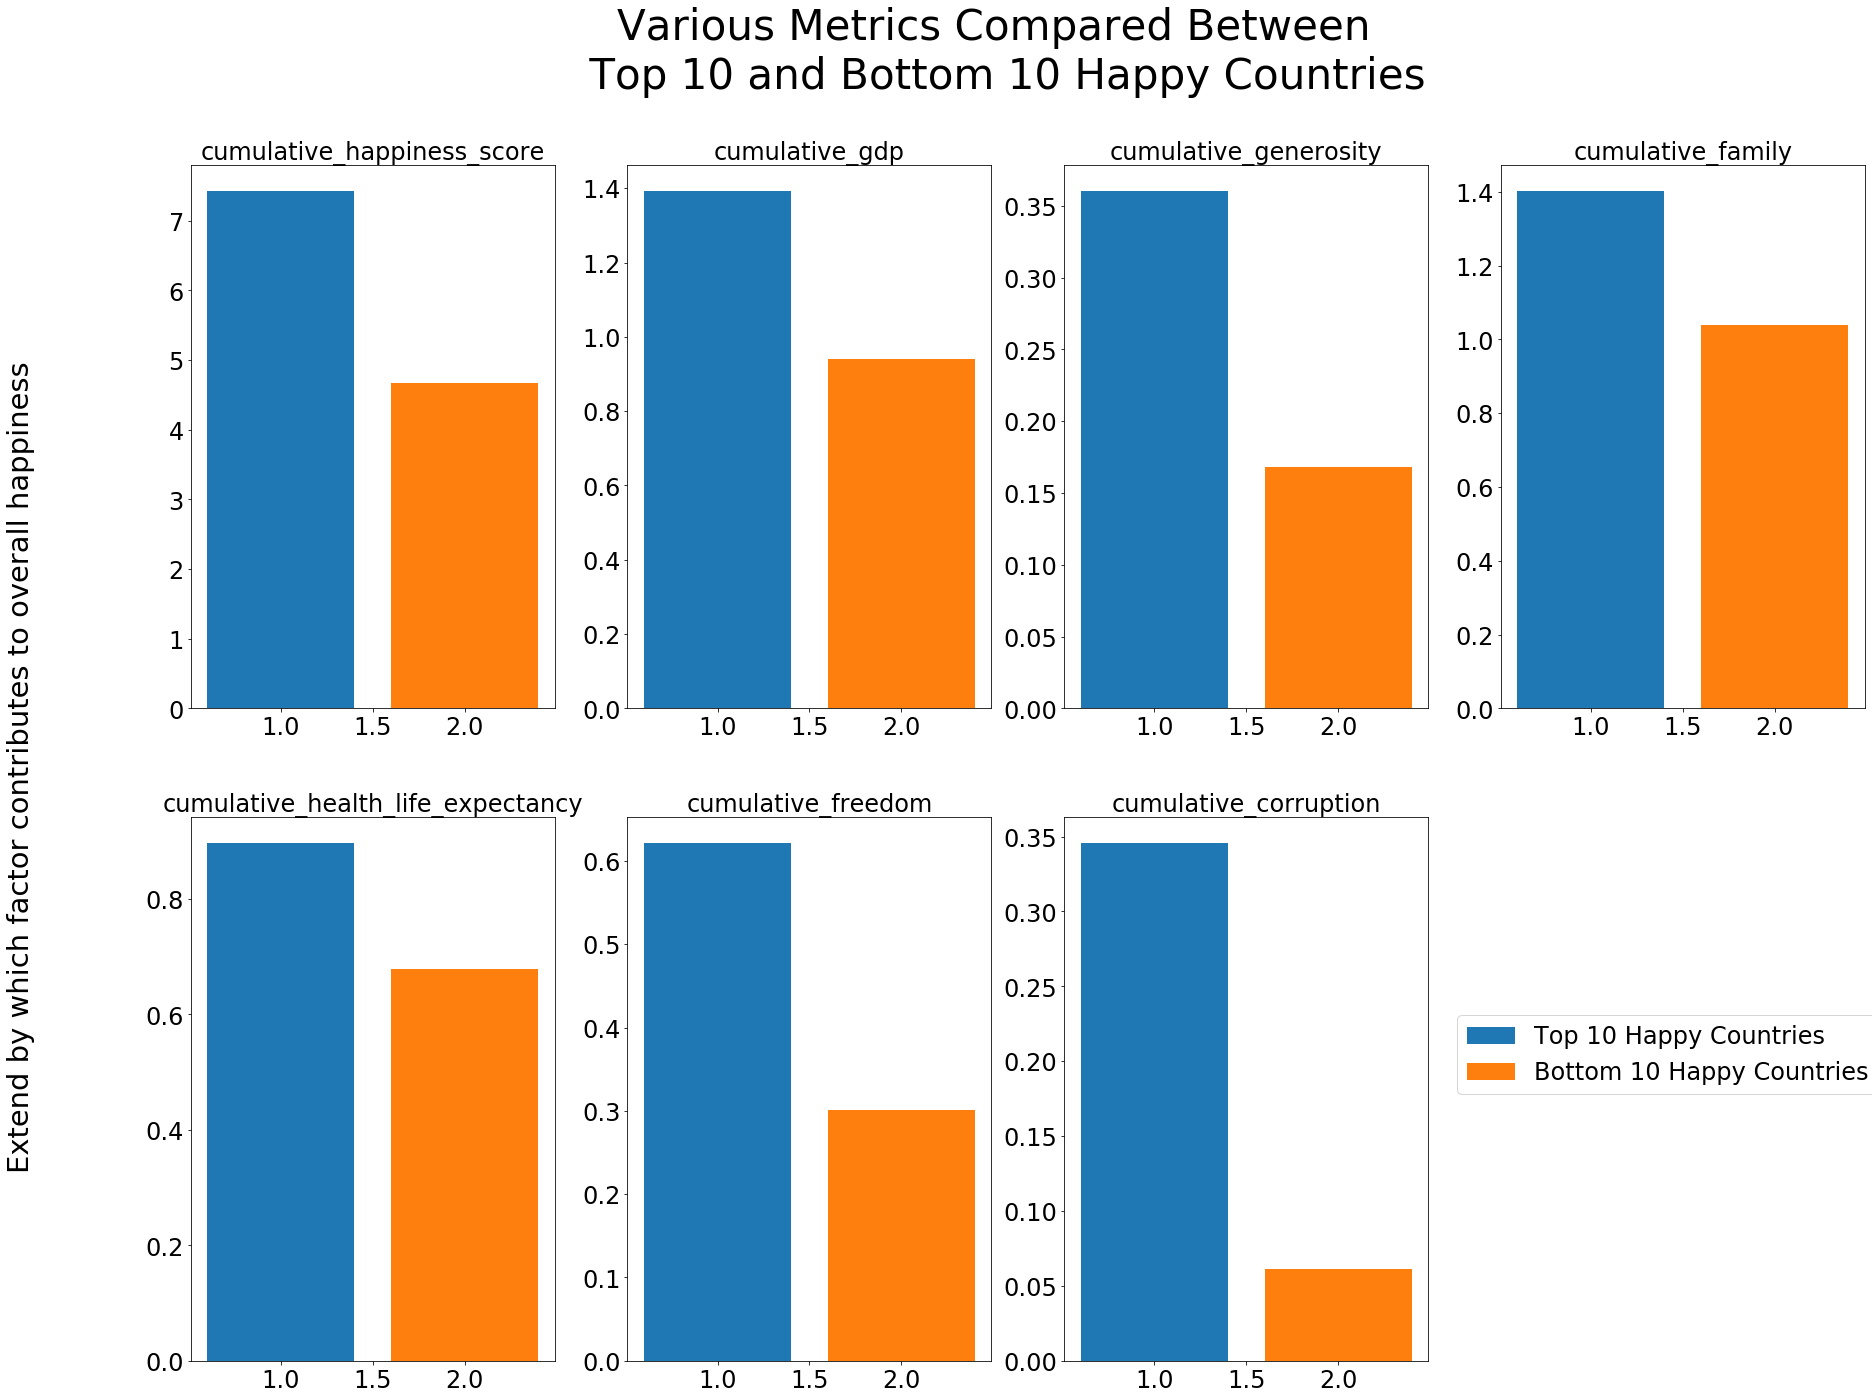

In [250]:
#USE#

fig, axs = plt.subplots(2,4, figsize=(30,22))
fig.delaxes(axs[1,3])
axs=axs.flatten()
idx=0
for i,df in enumerate([hap1, gdp1, gen1, fam1, heal1, free1, trust1]):
    l1 = axs[i].bar(1, df[0], label='Top 10 Happy Countries')
    l2 = axs[i].bar(2, df[1], label='Bottom 10 Happy Countries')
    axs[i].set_title(f'{nested_list_of_metric_dfs_and_column_names[idx][1]}', size = 24)
    #axs[i].legend()
    idx+=1
fig.suptitle('Various Metrics Compared Between \n Top 10 and Bottom 10 Happy Countries', size=42)
fig.text(0.04, 0.5, 'Extend by which factor contributes to overall happiness', 
         va='center', rotation='vertical', fontsize=29)
fig.legend(handles=(l1, l2), loc=0, bbox_to_anchor=(.875, 0.25))
plt.show()